In [1]:
import pandas as pd
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydata=pd.read_csv('D:\Seminar Matematika\Data Historis Aluminium Berjangka.csv')
#mydata['Tanggal']=pd.to_datetime(mydata['Tanggal'])
mydata.info()
print(mydata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     25 non-null     object
 1   Terakhir    25 non-null     object
 2   Pembukaan   25 non-null     object
 3   Tertinggi   25 non-null     object
 4   Terendah    25 non-null     object
 5   Vol.        25 non-null     object
 6   Perubahan%  25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB
    Tanggal  Terakhir Pembukaan Tertinggi  Terendah    Vol. Perubahan%
0   Jan '18  2.223,50  2.253,50  2.266,00  2.138,50   0,69K     -1,54%
1   Des '17  2.258,25  2.063,00  2.272,00  1.993,75   1,20K     11,08%
2   Nov '17  2.033,00  2.159,75  2.173,35  2.029,50   6,06K     -5,28%
3   Okt '17  2.146,25  2.083,50  2.180,25  2.083,50   0,33K      3,14%
4   Sep '17  2.081,00  2.076,00  2.173,63  2.072,75   0,81K     -1,06%
5   Ags '17  2.103,25  1.890,75  2.114,00  1.890,75   0,21K     10,71%
6

In [3]:
#Preparing Data
data1=list()
for i in range(len(mydata)):
    data1.append(mydata['Tanggal'][len(mydata)-1-i])
data2=list()
data_urut=list()
for i in range(len(mydata)):
    data_urut.append(mydata['Tertinggi'][len(mydata)-1-i])
for i in data_urut:
    if '.' in i:
        a=i.split('.')
        b=a[0]+a[1]
    else:
        b=i
    c=b.split(',')
    d=c[0]+'.'+c[1]
    d=float(d)
    data2.append(d)
data={'Tanggal' : data1,
      'Data' : data2}
df=pd.DataFrame(data)
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  25 non-null     object 
 1   Data     25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes
    Tanggal     Data
0   Jan '16  1530.25
1   Feb '16  1586.50
2   Mar '16  1596.75
3   Apr '16  1678.00
4   Mei '16  1631.75
5   Jun '16  1646.75
6   Jul '16  1670.25
7   Ags '16  1688.50
8   Sep '16  1664.00
9   Okt '16  1737.75
10  Nov '16  1784.00
11  Des '16  1755.00
12  Jan '17  1862.75
13  Feb '17  1920.25
14  Mar '17  1971.50
15  Apr '17  1964.00
16  Mei '17  1954.00
17  Jun '17  1923.75
18  Jul '17  1936.50
19  Ags '17  2114.00
20  Sep '17  2173.63
21  Okt '17  2180.25
22  Nov '17  2173.35
23  Des '17  2272.00
24  Jan '18  2266.00


In [4]:
#Menentukan himpunan semesta pembicaraan (U)
U=[round(min(df['Data'])),round(max(df['Data']))]
D1=3
D2=2 #Suka - suka wkwk
U=[U[0]-D1,U[1]+D2]
print(U)

[1527, 2274]


In [5]:
#Menentukan panjang interval (R)
R=U[1]-U[0]
R=round(R,2) #pembulatan
print(R)

747


In [6]:
#Menentukan banyaknya interval kelas
import math
n=len(df['Data'])
K=1+3.3*math.log10(n)
K=round(K) #ini ga tau penting atau engga
print(K)

6


In [7]:
#Menentukan lebar interval
L=R/K
print(L)

124.5


In [8]:
#Mendefinisikan himpunan fuzzy dan menentukan nilai tengah
I=list()
Interval=list()
m=list()
a=U[0]
for i in range(K):
    I.append('A'+str(i+1))
    Interval.append((a,round(a+L,3)))
    m.append((a+round(a+L,3))/2)
    a=round(a+L,3)
data_tabel={'Himpunan Fuzzy' : I,
              'Interval' : Interval,
              'Nilai Tengah' : m}
df1=pd.DataFrame(data_tabel)
df1.head(10)

,Himpunan Fuzzy,Interval,Nilai Tengah
0,A1,"(1527, 1651.5)",1589.25
1,A2,"(1651.5, 1776.0)",1713.75
2,A3,"(1776.0, 1900.5)",1838.25
3,A4,"(1900.5, 2025.0)",1962.75
4,A5,"(2025.0, 2149.5)",2087.25
5,A6,"(2149.5, 2274.0)",2211.75


In [9]:
#Membuat tabel Fuzzy Logical Relationship (FLR)
fuzzyfikasi=list()
relasi=list()
r=0
for i in range(n):
    for j in range(K):
        if df['Data'][i]>=df1['Interval'][j][0] and df['Data'][i]<=df1['Interval'][j][1]:
            fuzzyfikasi.append(df1['Himpunan Fuzzy'][j])
            if r==0:
                relasi.append('-')
            else:
                relasi.append(r+'->'+df1['Himpunan Fuzzy'][j])
            r=df1['Himpunan Fuzzy'][j]
            break
        else:
            continue
data_aktual={'Tanggal' : data1,
             'Data' : data2,
             'Fuzzyfikasi' : fuzzyfikasi,
             'Relasi' : relasi}
df2=pd.DataFrame(data_aktual)
df2.head(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
0,Jan '16,1530.25,A1,-
1,Feb '16,1586.50,A1,A1->A1
2,Mar '16,1596.75,A1,A1->A1
3,Apr '16,1678.00,A2,A1->A2
4,Mei '16,1631.75,A1,A2->A1
5,Jun '16,1646.75,A1,A1->A1
6,Jul '16,1670.25,A2,A1->A2
7,Ags '16,1688.50,A2,A2->A2


In [10]:
df2.tail(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
17,Jun '17,1923.75,A4,A4->A4
18,Jul '17,1936.50,A4,A4->A4
19,Ags '17,2114.00,A5,A4->A5
20,Sep '17,2173.63,A6,A5->A6
21,Okt '17,2180.25,A6,A6->A6
22,Nov '17,2173.35,A6,A6->A6
23,Des '17,2272.00,A6,A6->A6
24,Jan '18,2266.00,A6,A6->A6


In [11]:
#Membuat Fuzzy Logic Relationship Group
grup=list()
FLR=list()
for i in range(len(I)):
    grup.append('Grup '+str(i+1))
    FLR1=list()
    for j in range(1,n):
        if relasi[j][1:3]==str(i+1):
            FLR1.append(fuzzyfikasi[j])
        elif relasi[j][1:3]==str(i+1)+'-':
            FLR1.append(fuzzyfikasi[j])
        else:
            pass
    FLR2='A'+str(i+1)+'->'
    for ii in range(len(FLR1)):
        FLR2+=FLR1[ii]+','
    FLR2=FLR2[:-1]
    FLR.append(FLR2)
        
data_FLRG={'Grup' : grup,
           'Himpunan Fuzzy' : I,
           'FLR' : FLR}
df3=pd.DataFrame(data_FLRG)
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"A1->A1,A1,A2,A1,A2"
1,Grup 2,A2,"A2->A1,A2,A2,A2,A3,A3"
2,Grup 3,A3,"A3->A2,A4"
3,Grup 4,A4,"A4->A4,A4,A4,A4,A4,A5"
4,Grup 5,A5,A5->A6
5,Grup 6,A6,"A6->A6,A6,A6,A6"


In [12]:
#FLRG Pengulangan
#Catatan : Untuk run code ini, sebaiknya run yang sebelumnya terlebih dahulu agar terhindar dari error
for i in range(len(df3)):
    bb=df3['FLR'][i]
    if i>=0 and i<=8:
        bb=bb[4:]
    elif i>=9:
        bb=bb[5:]
    bb=bb.split(',')
    cc=list()
    for ii in range(len(bb)):
        if bb[ii] in cc:
            pass
        else:
            cc.append(bb[ii])
    dd=list()
    for j in range(len(cc)):
        k=0
        for jj in range(len(bb)):
            if cc[j]==bb[jj]:
                k+=1
            else:
                pass
        dd.append(str(k)+'('+cc[j]+')')
    df3['FLR'][i]=dd
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"[3(A1), 2(A2)]"
1,Grup 2,A2,"[1(A1), 3(A2), 2(A3)]"
2,Grup 3,A3,"[1(A2), 1(A4)]"
3,Grup 4,A4,"[5(A4), 1(A5)]"
4,Grup 5,A5,[1(A6)]
5,Grup 6,A6,[4(A6)]


In [13]:
#Pembuatan DataFrame Pembobotan Fuzzy
A=list()
o=list()
for i in range(len(df3)):
    A.append('A'+str(i+1))
    o.append(0)
df4={'X(t-1)' : A}
for i in range(len(df3)):
    df4[A[i]]=o
df4=pd.DataFrame(df4)
df4.head(K)        

,X(t-1),A1,A2,A3,A4,A5,A6
0,A1,0,0,0,0,0,0
1,A2,0,0,0,0,0,0
2,A3,0,0,0,0,0,0
3,A4,0,0,0,0,0,0
4,A5,0,0,0,0,0,0
5,A6,0,0,0,0,0,0


In [14]:
#Input Bobot Ke Dalam Matriks Pembobobotan Fuzzy
for i in range(len(df3)):
    x=df3['FLR'][i]
    for j in range(len(x)):
        y=x[j].split('(')
        y2=y[1]
        if y2==')':
            pass
        else:
            df4[y2[:-1]][i]=int(y[0])
for i in range(len(df4)):
    df4[A[i]]=df4[A[i]].astype(float)
df4.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,X(t-1),A1,A2,A3,A4,A5,A6
0,A1,3.0,2.0,0.0,0.0,0.0,0.0
1,A2,1.0,3.0,2.0,0.0,0.0,0.0
2,A3,0.0,1.0,0.0,1.0,0.0,0.0
3,A4,0.0,0.0,0.0,5.0,1.0,0.0
4,A5,0.0,0.0,0.0,0.0,0.0,1.0
5,A6,0.0,0.0,0.0,0.0,0.0,4.0


In [15]:
#Pembobotan Normalisasi
Bobot_Norm=df4.drop(['X(t-1)'],axis=1)
Bobot_Norm=Bobot_Norm.values
for i in range(len(Bobot_Norm)):
    jum=sum(Bobot_Norm[i])
    for j in range(len(Bobot_Norm)):
        ele=float(Bobot_Norm[i][j])
        Bobot_Norm[i][j]=ele/jum
print(Bobot_Norm)

[[0.6        0.4        0.         0.         0.         0.        ]
 [0.16666667 0.5        0.33333333 0.         0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         0.         0.83333333 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         0.         1.        ]]


In [16]:
#Perkalian Elemen Bobot Normalisasi dengan Median (m1 X Bobot A1)
M=list()
for i in range(K):
    Mn=list()
    for j in range(K):
        Mnn=Bobot_Norm[i][j]*df1['Nilai Tengah'][j]
        Mn.append(Mnn)
    M.append(Mn)
print(M)

[[953.55, 685.5, 0.0, 0.0, 0.0, 0.0], [264.875, 856.875, 612.75, 0.0, 0.0, 0.0], [0.0, 856.875, 0.0, 981.375, 0.0, 0.0], [0.0, 0.0, 0.0, 1635.625, 347.875, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 2211.75], [0.0, 0.0, 0.0, 0.0, 0.0, 2211.75]]


In [17]:
#Pembuatan Data Frame Peramalan
t=list()
for i in range(len(df)):
    t.append(i+1)
df6={'t' : t,
     'Tanggal' : df['Tanggal'],
     'Data' : df['Data']}
Ft=list()
Ft.append(0)
for i in range(1,len(df)):
    Wn=df2['Fuzzyfikasi'][i-1]
    Wn=int(Wn[1:])
    jum_norm=sum(M[Wn-1])
    Ft.append(jum_norm)
df6['Peramalan F(t)']=Ft
df6=pd.DataFrame(df6)
df6.info()
df6.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               25 non-null     int64  
 1   Tanggal         25 non-null     object 
 2   Data            25 non-null     float64
 3   Peramalan F(t)  25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 928.0+ bytes


,t,Tanggal,Data,Peramalan F(t)
0,1,Jan '16,1530.25,0.00
1,2,Feb '16,1586.50,1639.05
2,3,Mar '16,1596.75,1639.05
3,4,Apr '16,1678.00,1639.05
4,5,Mei '16,1631.75,1734.50
5,6,Jun '16,1646.75,1639.05
6,7,Jul '16,1670.25,1639.05
7,8,Ags '16,1688.50,1734.50


In [18]:
df6.tail(8)

,t,Tanggal,Data,Peramalan F(t)
17,18,Jun '17,1923.75,1983.50
18,19,Jul '17,1936.50,1983.50
19,20,Ags '17,2114.00,1983.50
20,21,Sep '17,2173.63,2211.75
21,22,Okt '17,2180.25,2211.75
22,23,Nov '17,2173.35,2211.75
23,24,Des '17,2272.00,2211.75
24,25,Jan '18,2266.00,2211.75


In [85]:
#Menghitung Nilai Error (|e|)
df7={'t' : df6['t'],
     'Tanggal' : df6['Tanggal'],
     'Data' : df6['Data'],
     'Peramalan F(t)' : df6['Peramalan F(t)']}
e=list()
e.append(0)
for i in range(1,len(df6)):
    ee=df6['Data'][i]-df6['Peramalan F(t)'][i]
    ee=math.sqrt(ee**2)
    e.append(ee)
df7['Error']=e
df7=pd.DataFrame(df7)
df7.info()
df7.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               25 non-null     int64  
 1   Tanggal         25 non-null     object 
 2   Data            25 non-null     float64
 3   Peramalan F(t)  25 non-null     float64
 4   Error           25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


,t,Tanggal,Data,Peramalan F(t),Error
0,1,Jan '16,1530.25,0.00,0.00
1,2,Feb '16,1586.50,1639.05,52.55
2,3,Mar '16,1596.75,1639.05,42.30
3,4,Apr '16,1678.00,1639.05,38.95
4,5,Mei '16,1631.75,1734.50,102.75
5,6,Jun '16,1646.75,1639.05,7.70
6,7,Jul '16,1670.25,1639.05,31.20
7,8,Ags '16,1688.50,1734.50,46.00


In [86]:
df7.tail(8)

,t,Tanggal,Data,Peramalan F(t),Error
17,18,Jun '17,1923.75,1983.50,59.75
18,19,Jul '17,1936.50,1983.50,47.00
19,20,Ags '17,2114.00,1983.50,130.50
20,21,Sep '17,2173.63,2211.75,38.12
21,22,Okt '17,2180.25,2211.75,31.50
22,23,Nov '17,2173.35,2211.75,38.40
23,24,Des '17,2272.00,2211.75,60.25
24,25,Jan '18,2266.00,2211.75,54.25


In [87]:
#Menentukan MAE atau MSE
N=len(e)
MAE=sum(e)/N
e_kuadrat=list()
for i in range(N):
    e_kuadrat.append(e[i]**2)
MSE=sum(e_kuadrat)/N
RMSE=math.sqrt(MSE)
print('Nilai MAE adalah ', MAE)
print('Nilai MSE adalah ', MSE)
print('Nilai RMSE adalah ', RMSE)

Nilai MAE adalah  50.3588
Nilai MSE adalah  3680.1902760000003
Nilai RMSE adalah  60.66457183562743


<function matplotlib.pyplot.show(*args, **kw)>

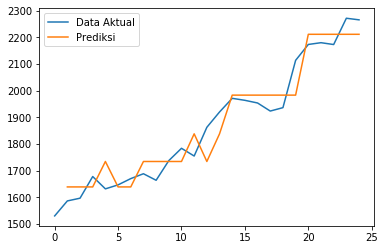

In [89]:
plt.plot(df7['Data'], label="Data Aktual")
plt.plot(df7['Peramalan F(t)'][1:], label="Prediksi")
plt.legend(loc='upper left')
plt.show